In [2]:
import pandas as pd
import AnalFunctions as af
import numpy as np
import matplotlib.pyplot as plt
import os
import math as m
import seaborn as sns

path, folder_list, N_runs, b, cross_var, folder_frame, test_str, test_var, test_var2, test_str2, lin_var, T_test_list, sec_test_var, N_ped, fps, mot_frac = af.var_ini()
af.file_writer(path, folder_list, N_runs, b, cross_var, folder_frame, test_str, test_var)

sl = "/"
T_test_list = lin_var[test_var2]
lattice_type = 'jule'
runs_tested = N_runs
traj_testvar2 = []


def dist(x1, y1, x2, y2, x3, y3): # x3,y3 is the point

    px = x2-x1
    py = y2-y1

    norm = px*px + py*py

    u =  ((x3 - x1) * px + (y3 - y1) * py) / float(norm)

    #u_new = np.array([1 if ui > 1 else 0 for ui in u])
    u[u > 1] = 1
    u[u < 0] = 0

    x = x1 + u * px
    y = y1 + u * py

    dx = x - x3
    dy = y - y3

    # Note: If the actual distance does not matter,
    # if you only want to compare what this function
    # returns to other results of this function, you
    # can just return the squared distance instead
    # (i.e. remove the sqrt) to gain a little performance

    dist = np.sqrt(dx*dx + dy*dy)
    return dist



current path is  trajectories/ini_lm_N_ped1000_tmax1000_size_0_1_fps_1_testvar_esigma/
Index(['Unnamed: 0', 'ini_folder', 'b', 'v0', 'T', 'rho', 'esigma', 'N_ped',
       'mot_frac'],
      dtype='object')
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
Name: T, dtype: float64
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[0.000e+00 1.000e+01 1.340e+00 1.000e+00 2.000e+00 1.000e+03 1.000e+00
  4.000e-01]
 [3.140e-01 1.000e+01 1.340e+00 1.000e+00 2.000e+00 1.000e+03 1.000e+00
  4.000e-01]
 [6.280e-01 1.000e+01 1.340e+00 1.000e+00 2.000e+00 1.000e+03 1.000e+00
  4.000e-01]
 [9.420e-01 1.000e+01 1.340e+00 1.000e+00 2.000e+00 1.000e+03 1.000e+00
  4.000e-01]
 [1.257e+00 1.000e+01 1.340e+00 1.000e+00 2.000e+00 1.000e+03 1.000e+00
  4.000e-01]
 [1.571e+00 1.000e+01 1.340e+00 1.000e+00 2.000e+00 1.000e+03 1.000e+00
  4.000e-01]
 [1.885e+00 1.000e+01 1.340e+00 1.000e+00 2.000e+00 1.000e+03 1.000e+00
  4.000e-01]
 [2.199e+00 1.000e+01 1.340e+0

IndexError: index 0 is out of bounds for axis 0 with size 0

In [5]:
a = np.array([0.314,
0.628,
0.942,
1.257,
1.571,
1.885,
2.199,
2.513,
2.827,
3.142,])

print(a == 0.942)

[False False  True False False False False False False False]


In [4]:
"""sl = "/"
print("writing files")
folder_anal_frame = [np.array(folder_frame[(folder_frame[test_str] == var[test_var])]['ini_folder'])[0] for var in
                     cross_var]
for i in range(N_runs):
    location = np.array(
        ["new_evac_traj_" + af.b_data_name(2 * b[var], 3) + "_" + str(i) + ".txt" for var in range(cross_var.shape[0])])
    seg_location = np.array(
        ["evac_traj_" + af.b_data_name(2 * b[var], 3) + "_" + str(i) for var in range(cross_var.shape[0])])
    for loc, run_folder, segloc in zip(location, folder_list,seg_location):

        file_name = path + run_folder + sl + loc
        if os.path.isfile(file_name):
            file = open(file_name, 'r')
            line_count = 0
            new_file_name = path + run_folder + sl + "stitch_" + loc
            if os.path.isfile(new_file_name) == False:
                new_file = open(new_file_name, 'w')

                for line in file:
                    new_file.write(line)
                string = "_000"
                segment = np.arange(1,10)
                for seg in segment:
                    segnumber = string + str(seg)
                    segfile = path + run_folder + sl + segloc + segnumber + ".txt"
                    #print(segfile)
                    if os.path.isfile(segfile):
                        stichfile = open(segfile,"r")
                        line_count = 1
                        for line in stichfile:
                            if line_count > 13:
                                new_file.write(line)
                            line_count += 1
                        os.system("rm " + segfile)
                    else:
                        print("!!!!!!!!there is no " + segfile + "!!!!!!!!")
                        break

                new_file.close()
                
        else:
            print("WARNING: file " + file_name + " not found")

    
"""

'sl = "/"\nprint("writing files")\nfolder_anal_frame = [np.array(folder_frame[(folder_frame[test_str] == var[test_var])][\'ini_folder\'])[0] for var in\n                     cross_var]\nfor i in range(N_runs):\n    location = np.array(\n        ["new_evac_traj_" + af.b_data_name(2 * b[var], 3) + "_" + str(i) + ".txt" for var in range(cross_var.shape[0])])\n    seg_location = np.array(\n        ["evac_traj_" + af.b_data_name(2 * b[var], 3) + "_" + str(i) for var in range(cross_var.shape[0])])\n    for loc, run_folder, segloc in zip(location, folder_list,seg_location):\n\n        file_name = path + run_folder + sl + loc\n        if os.path.isfile(file_name):\n            file = open(file_name, \'r\')\n            line_count = 0\n            new_file_name = path + run_folder + sl + "stitch_" + loc\n            if os.path.isfile(new_file_name) == False:\n                new_file = open(new_file_name, \'w\')\n\n                for line in file:\n                    new_file.write(line)\n   

In [2]:
from scipy.spatial import Delaunay
import CorFunFast as cff

def foldermaker(foldername):
    folder = ''
    folderold = ''
    for l in foldername:
        if l != "/":
            folder += l
        else:
            print(folder)
            if folderold == '':
                os.system("mkdir " + path + "plots/structure/" + folder)
            else:
                os.system("mkdir " + path + "plots/structure/"+ folderold + "/" + folder)
            folderold = folder
            folder = ''


def OrderFieldPlot(order_matrix_2,x_heat,y_heat,XY_red,foldername,datname,form,value_max,value_min,colorscheme,savenpy):    
    #print(np.array(order_matrix_2).mean())
    #print(XY_red['Bf'].values.mean())
    foldermaker(foldername)
    os.system("mkdir " + path + "plots/structure" + foldername)
    if savenpy:
        np.save(path + "plots/structure/"+ foldername + datname + ".npy",np.array(order_matrix_2))
    ordermatrix = np.array(order_matrix_2).mean(axis=1).mean(axis=0)[:-1, :-1]
    z_min, z_max = ordermatrix.min(), ordermatrix.max()

    fig, ax = plt.subplots(figsize = (13, 10))
    if value_max == "none":
        value_max = z_max
    if value_min == "none":
        value_min = z_min
    c = ax.pcolormesh(x_heat, y_heat, ordermatrix, cmap=colorscheme,vmin = value_min, vmax = value_max)
    # set the limits of the plot to the limits of the data
    ax.axis([x_heat.min(), x_heat.max(), y_heat.min(), y_heat.max()])
    fig.colorbar(c, ax=ax)
    plt.savefig(path + "plots/structure/"+ foldername + datname + "." + form)
    plt.show()
    
def MeanBondFacotrR(order_matrix_2,x_heat,y_heat,foldername,datname,form,ylimit):
    foldermaker(foldername)
    xymesh = np.meshgrid(x_heat,y_heat)
    x_r = np.round(xymesh[0].flatten(),1)
    y_r = np.round(xymesh[1].flatten(),1)
    orderlist = np.array(order_matrix_2).mean(axis=1).mean(axis=0).flatten()
    r = np.round(np.sqrt(x_r ** 2 + y_r ** 2),0)
    orderframe = pd.DataFrame({'r':r, 'order':orderlist})
    new_r = np.arange(0,10,1)
    ordermean = []
    for r in new_r:
        ordermean.append(orderframe[orderframe['r'] == r]["order"].values.mean())

    """plt.ylim(ylimit)
    plt.scatter(new_r,ordermean)
    plt.xlabel("r in m")
    plt.ylabel("bond factor")
    plt.savefig(path + "plots/structure/"+ foldername + datname + "." + form)
    plt.show()"""
    return new_r, ordermean

def find_neighbors(pindex, triang,filtered,filterbox):
    neigh = triang.vertex_neighbor_vertices[1][triang.vertex_neighbor_vertices[0][pindex]:triang.vertex_neighbor_vertices[0][pindex+1]]
    if filtered:
        return neighboursFilter(neigh,filterbox)
    else:
        return neigh

def indexDistance(p_index,tri,filtered,filterbox):
    neigh = find_neighbors(p_index,tri,filtered,filterbox)
    dist_list = np.empty(neigh.shape[0])
    for n in range(neigh.shape[0]):
        bond = tri.points[neigh[n]] - tri.points[p_index]
        dist = np.linalg.norm(bond)
        dist_list[n] = dist
    return dist_list
    
def localBondOrientationFactor(p_index,tri,filtered,filterbox):
    neigh = find_neighbors(p_index,tri,filtered,filterbox)
    Nb = neigh.shape[0]
    bond_orientation_list = np.empty(Nb)
    cos_sum = 0
    for n in range(Nb - 1):
        bond1 = tri.points[neigh[n]] - tri.points[p_index]
        bond2 = tri.points[neigh[n+1]] - tri.points[p_index]
        leng1 = np.linalg.norm(bond1)
        leng2 = np.linalg.norm(bond2)
        bond1 = bond1/leng1
        bond2 = bond2/leng2
        #print(round(np.dot(bond1,bond2),4))
        #print(np.dot(bond1,bond2) - pi/6)
        bond_angle = np.cos(6 * np.arccos(round(np.dot(bond1,bond2),4)))
        cos_sum += bond_angle

    nb_sum = 1/(Nb -1) * cos_sum

    return nb_sum

def bondOrientationFactor(tri,N,filtered,filterbox):
    nb_sum = 0
    for p_index in range(N):
            #print(tri.points[p_index])
        neigh = find_neighbors(p_index,tri,filtered,filterbox)
        Nb = len(neigh)
        cos_sum = 0
        for n in range(Nb-1):
            bond1 = tri.points[neigh[n]] - tri.points[p_index]
            bond2 = tri.points[neigh[n+1]] - tri.points[p_index]
            leng1 = np.dot(bond1,bond1)
            leng2 = np.dot(bond2,bond2)
            bond1 = bond1/np.sqrt(leng1)
            bond2 = bond2/np.sqrt(leng2)
            #print(round(np.dot(bond1,bond2),4))
            bond_angle = np.cos(6 * np.arccos(round(np.dot(bond1,bond2),4)))
            #bond_angle = round(np.dot(bond1,bond2),4)

            #print(bond_angle)
            cos_sum += bond_angle
        nb_sum += 1/(Nb -1) * cos_sum

    return 1/N * nb_sum

def hexagonalLattice(N_in,a,mu,lb,hb,N):
    # (N_in/a)**2 is the number of points
    #a is point distance
    #mu is noise level
    #lb and hb are the bounds of the uniform distribution
    #N is the number of hexagonal lattices that are produced and written into a N X N_in^2/a^2 dimensional array
    N_particles = int(N_in * N_in/a**2)
    l_x = np.empty([N,N_particles])
    l_y = np.empty([N,N_particles])

    for i in range(N):
        h_list = np.arange(0,N_in,a)
        l_list = np.arange(0,N_in,a)
        x = np.array([(h/2 - 1/2 * l) for h in h_list for l in l_list])
        y = np.array([(m.sqrt(3)/2 * h + m.sqrt(3)/2 * l) for h in h_list for l in l_list])
        x_noise = mu * np.random.uniform(lb,hb ,x.shape[0])
        y_noise = mu * np.random.uniform(lb,hb,y.shape[0])
        x = x + x_noise
        y = y + y_noise
        l_x[i] = x
        l_y[i] = y
    
    return l_x,l_y

def latticeDistance(tri,box):
    dist = []
    dist_tri = []
    #check for box for distance
    for t in points[tri.simplices]:
        #print(t[0])
        boxcheck0 = boxchecker(t[0],box)
        boxcheck1 = boxchecker(t[1],box)
        boxcheck2 = boxchecker(t[2],box)
        if boxcheck0 + boxcheck1 + boxcheck2 == False:
            #print("outside the box")
            continue            
            
        dist_i = []
        """print("distance")
        print(t[0],t[1])
        print(t[0]-t[1])"""
        if boxcheck0 and boxcheck1:
            d1 = t[0] - t[1]
            d1 = np.linalg.norm(d1)
            dist.append(d1)
            dist_i.append(d1)
        if boxcheck0 and boxcheck2:
            d2 = t[0] - t[2]
            d2 = np.linalg.norm(d2)
            dist.append(d2)
            dist_i.append(d2)
        if boxcheck1 and boxcheck2:
            d3 = t[1] - t[2]
            d3 = np.linalg.norm(d3)
            dist.append(d3)
            dist_i.append(d3)
        dist_tri.append(dist_i)
    return np.array(dist_tri), np.array(dist)

def delHexMeasure(dist_tri,dist):
    dist_mean = dist.mean()
    del_m = dist_tri - dist_mean
    del_m = np.abs(del_m)
    del_m = np.sum(del_m,axis = 1)
    del_m = del_m.mean()
    return del_m

def normal(lattice_x, lattice_y, x_array, y_array, a):
    x_dens = np.array(
        [lattice_x - x for x in x_array])  # calculate the distant of lattice pedestrians to the measuring lattice
    y_dens = np.array([lattice_y - y for y in y_array])
    rho_matrix_x = np.array([densty1d(delta_x, a) for delta_x in x_dens])  # density matrix is calculated
    rho_matrix_y = np.array([densty1d(delta_y, a) for delta_y in y_dens])
    rho_matrix = np.matmul(rho_matrix_x, np.transpose(rho_matrix_y))
    return rho_matrix.T

def densty1d(delta_x, a):
    return np.array(list(map(lambda x: 1 / (m.sqrt(m.pi) * a) * m.e ** (-x ** 2 / a ** 2), delta_x)))

def densty1dWeight(delta_x, weight,a):
    return np.array(list(map(lambda var: np.sqrt(abs(var[1])) / (m.sqrt(m.pi) * a) * m.e ** (-var[0] ** 2 / a ** 2), zip(delta_x,weight))))

def densty1dWeightSign(delta_x, weight,a):
    return np.array(list(map(lambda var: np.sqrt(var[1]) / (m.sqrt(m.pi) * a) * m.e ** (-var[0] ** 2 / a ** 2) if var[1] > 0 else -np.sqrt(abs(var[1])) / (m.sqrt(m.pi) * a) * m.e ** (-var[0] ** 2 / a ** 2), zip(delta_x,weight) )))

def orderField(lattice_x,lattice_y,order,x_array,y_array,a):
    x_dens = np.array([lattice_x - x for x in x_array])  # calculate the distant of lattice pedestrians to the measuring lattice
    y_dens = np.array([lattice_y - y for y in y_array])

    rho_matrix_x = np.array([densty1dWeightSign(delta_x,order, a) for delta_x in x_dens])  # density matrix is calculated
    rho_matrix_y = np.array([densty1dWeight(delta_y,order, a) for delta_y in y_dens])
    rho_matrix = np.matmul(rho_matrix_x, np.transpose(rho_matrix_y))
    order_matrix = rho_matrix.T/normal(lattice_x, lattice_y, x_array, y_array, a)
    
    return order_matrix
    
def localOrientationMeasures(tri,N,filtered,filterbox):
    neighbour_list = np.empty(N)
    neigh_dist_list = np.empty(N)
    local_bond_list = np.empty(N)
    mean_neighdist_list = np.empty(N)
    #dist_tri, dist = latticeDistance(tri,filterbox)
    #distmean = dist.mean()
    for p_index in range(N):
        neigh_dist = indexDistance(p_index,tri,filtered,filterbox)
        neighbour_list[p_index] = len(find_neighbors(p_index,tri,filtered,filterbox))
        neigh_dist_list[p_index] = np.var(neigh_dist/neigh_dist.mean())#np.sum(np.abs(np.round(neigh_dist/distmean - 1,3)))/neigh_dist.shape[0] #np.var(neigh_dist/neigh_dist.mean())#
        local_bond_list[p_index] = localBondOrientationFactor(p_index,tri,filtered,filterbox)
        mean_neighdist_list[p_index] = neigh_dist.mean()
    return neighbour_list, neigh_dist_list, local_bond_list, mean_neighdist_list
    
def pedReducer(XY,x_min,x_max,y_min,y_max,Nn_max):
    #XY_red = XY[XY['Nn'] < Nn_max]
    XY_red = XY[XY['x'] < x_max]
    XY_red = XY_red[XY_red['x'] > x_min]
    XY_red = XY_red[XY_red['y'] < y_max]
    XY_red = XY_red[XY_red['y'] > y_min]
    return XY_red

def filtration(var,filvar,fillist,i):
    if var < filvar:
        fillist.append(i)
    
def neighboursFilter(neighbours,filterbox):
    #filgerbox[x_min,x_max,y_min,y_max]
    for i in np.arange(neighbours.shape[0]):
        del_list = []
        if boxchecker(tri.points[neighbours[i]],filterbox):
            del_list.append(i)
        
    neighbours = np.delete(neighbours,del_list)
    return neighbours
    

In [3]:
def trajReduce(second,df,fps,dummy):
    df_t = df[df['FR'] == second * fps]
    x = df_t['X'].values#/100
    y = df_t['Y'].values#/100
    speed_nn = df_t['speed_nn'].values
    if dummy:
        y_add = np.array([-0.1 for i in range(100)])
        x_add = np.linspace(-25,25,100)
        speed_add = np.array([0 for i in range(100)])
        x = np.append(x,x_add)
        y = np.append(y,y_add)
        speed_nn = np.append(speed_nn,speed_add)
    XY = pd.DataFrame({'x':x,'y':y,'speed_nn':speed_nn})
    return XY

def boxchecker(point,box):
    if point[0] < box[0]:
        return False
    elif point[0] > box[1]:
        return False
    elif point[1] < box[2]:
        return False
    elif point[1] > box[3]:
        return False
    else:
        return True
    
def dummyadd(df):
    x = df['x'].values
    y = df['y'].values
    x_min = df['x'].min() - 1
    x_max = df['x'].max() + 1
    y_min = df['y'].min() - 1
    y_max = df['y'].max() + 1
    
    y_add = np.array([i for i in np.arange(y_min,y_max)])
    x_add = np.array([x_min for i in np.arange(y_min,y_max)])
    x = np.append(x,x_add)
    y = np.append(y,y_add)
    y_add = np.array([i for i in np.arange(y_min,y_max)])
    x_add = np.array([x_max for i in np.arange(y_min,y_max)])
    x = np.append(x,x_add)
    y = np.append(y,y_add)
    x_add = np.array([i for i in np.arange(x_min,x_max)])
    y_add = np.array([y_min for i in np.arange(x_min,x_max)])
    x = np.append(x,x_add)
    y = np.append(y,y_add)
    x_add = np.array([i for i in np.arange(x_min,x_max)])
    y_add = np.array([y_max for i in np.arange(x_min,x_max)])
    x = np.append(x,x_add)
    y = np.append(y,y_add)
    
    XY = pd.DataFrame({'x':x,'y':y})
    
    return XY

def neighbourHist(tri):
    unique, counts = np.unique(tri.simplices, return_counts=True)
    nphist = np.histogram(counts,density = True,bins=range(1, 10))
    plt.plot(nphist[1][:-1],nphist[0], marker = "o", linestyle='none')
    plt.show()
    
def plotColorScatter(XY_red,var1,var2,var3,fileloc,vmax,vmin,colormap):
    if vmax == "none":
        vmax = XY_red[var2].values.max()
    if vmin == "none":
        vmin = XY_red[var2].values.min()
    fig, ax = plt.subplots(figsize = (13, 10))
    cm = plt.cm.get_cmap(colormap)
    sc = plt.scatter(XY_red[var1].values,XY_red[var2].values, c = XY_red[var3].values, cmap=cm,vmax = vmax,vmin = vmin)
    fig.colorbar(sc)
    plt.savefig(fileloc)
    plt.show()
    
def plot_correlation(g_tensor, data_name,path,extention, r_array, phi_array, para, ow_bool):
    # normal_mean = normal_tensor.mean()
    mean_phi_g_tensor = g_tensor.mean(axis=1)# mean_g_tensor.mean(axis=1)

    # mean_phi_g_tensor = g_tensor.mean(axis = 0)
    N_phi = int(round(sum(phi_array)))
    file_name = 'G(R)' + data_name + "_N_phi=_" + str(N_phi)
    file_name_log = 'G(R)_log_' + data_name + "_N_phi=_" + str(N_phi)
    caption = 'G(r) for N phi = ' + str(N_phi) + ' N ped = ' + para[0] + ' N x y = ' + para[1] + ' ' + para[2] + \
              ' Mot = ' + para[3] + 'x lim = ' + para[4] + ' ' + para[5] + 'y lim = ' + para[5] + ' ' + para[6]
    plt.plot(r_array, mean_phi_g_tensor)  # / normal_mean)

    plt.xlabel("r")
    plt.ylabel("G(r)")
    plt.title("Two Point Correlation Function")
    plt.savefig(path + file_name + extention)
    #latex_writer(file_name, caption, begin=True, end=False, overwrite=ow_bool)

    plt.show()
    plt.plot(r_array, mean_phi_g_tensor)

    plt.yscale('log')
    plt.savefig(path + file_name_log + extention)

    plt.show()
    #latex_writer(file_name_log, caption, begin=False, end=True, overwrite=False)

    x_heat = np.array([[r * m.cos(phi) for phi in phi_array] for r in r_array])
    y_heat = np.array([[r * m.sin(phi) for phi in phi_array] for r in r_array])

    g_matrix_phi1 = g_tensor[:-1, :-1]
    print(g_matrix_phi1.min())
    print(g_matrix_phi1.max())

    z_min, z_max = g_matrix_phi1.min(), g_matrix_phi1.max()
    print(x_heat.shape, y_heat.shape, g_matrix_phi1.shape)
    print(z_min, z_max)

    fig, ax = plt.subplots()

    c = ax.pcolormesh(x_heat, y_heat, g_matrix_phi1, cmap='Blues', vmin=z_min, vmax=z_max)
    ax.set_title('two point correlation')
    print(z_min, z_max)
    # set the limits of the plot to the limits of the data
    ax.axis([x_heat.min(), x_heat.max(), y_heat.min(), y_heat.max()])
    print(x_heat.min())
    fig.colorbar(c, ax=ax)
    plt.savefig(path + 'G_Heat_ ' + data_name + "_N_phi=_" + str(r_array.shape[0]) + extention)
    plt.show()


In [ ]:
x_min = -10
x_max = 10
y_min = 0
y_max = 20
box= [x_min,x_max,y_min,y_max]


x_l = []
y_l = []
col = ["FR","X","Y","speed_nn"]
#col = ["id" ,"frame", "x/cm", "y/cm"]

blist = 2 * lin_var[test_var]
from itertools import groupby
filtered = True
os.system("mkdir " + path + "plots")
run_number = 0
os.system("mkdir " + path + "plots/structure")
os.system("mkdir " + path + "plots/structure/XYcsv")
os.system("mkdir " + path + "plots/structure/dist_factor")
os.system("mkdir " + path + "plots/structure/bond_factor")
XYFileSystem = []
for T_test in T_test_list:
    folder_frame_frac = np.array(folder_frame.loc[folder_frame[test_str2] == T_test]['ini_folder'])
    b_folder = np.array(folder_frame.loc[folder_frame[test_str2] == T_test]['b'])
    loc_list = [[path + folder + sl + "new_evac_traj_" + af.b_data_name(2 * bi, 3) + "_" + str(i) + ".txt" for i in
                 range(N_runs)] for folder, bi in zip(folder_frame_frac, b_folder)]
    bi = 0
    for loc_list_runs in loc_list:
        print("<calculating " + test_str + " = " + str(lin_var[test_var][bi]) + ">")
        """if lin_var[test_var][bi] in [0.15,0.3,0.5,5.0]:
            bi += 1
            continue"""
        bond_array = []
        del_m_array = []
        order_matrix_1 = []
        dens_matrix_1 = []
        dist_matrix_1 = []
        neigh_matrix_1 = []
        speed_matrix_1 = []
        #time_list = np.array([5,10,15,20,25,50,60,70,80,90,100,125,150,200,225,250,275,300])
        time_list = np.array([300])
        

        for second in time_list:
            for loc, ni in zip(loc_list_runs,range(len(loc_list_runs))):
                if os.path.isfile(loc) == False:
                    print("WARNING: file " + loc + " not found.")
                    continue
                    
                #print(loc)
                print("second = ", second, "run i = ", ni)
                df = pd.read_csv(loc, sep="\s+", header=0, comment="#",skipinitialspace=True, usecols=col)
                if df['FR'].max() < second:
                    print("max time passed")
                    continue
                XY = trajReduce(second,df,fps,True)
                x = XY['x'].values
                y = XY['y'].values
                #x,y = hexagonalLattice(100,1,0,0,1,1)
                #XY = pd.DataFrame({'x':x[0],'y':y[0]})
                print("<Calculate Delaunay and local bond factor>")
                points = np.vstack((x,y)).T
                tri = Delaunay(points)
                """plt.triplot(points[:,0], points[:,1], tri.simplices)
                plt.plot(points[:,0], points[:,1], 'o')
                plt.xlim(-2.5,2.5)
                plt.ylim(0,5)
                plt.show()"""
                
                N = tri.points.shape[0]
                local_bond_list = np.empty(N)
                print("<calc local measure>")
                neighbour_list, neigh_dist_list, local_bond_list, mean_neighdist_list = localOrientationMeasures(tri,N,filtered,box)
                print("<\calc local measure>")
                XY['Nn'] = neighbour_list
                XY['Dm'] = neigh_dist_list
                XY['Bf'] = local_bond_list
                XY['Nd'] = mean_neighdist_list
                XY_red = pedReducer(XY,x_min,x_max,y_min,y_max,300)

                csvname = path + "plots/structure/XYcsv/" + af.b_data_name(lin_var[test_var][bi],3) + "t" + str(second) + "runi_" + str(ni) + ".csv"
                XY.to_csv(csvname)
                XYFileSystem.append([csvname,second,ni,lin_var[test_var][bi]])
                
        bi += 1

dfcsv = pd.DataFrame()
dfcsv['files'] = [i[0] for i in XYFileSystem]
dfcsv['time'] = [i[1] for i in XYFileSystem]
dfcsv['index'] = [i[2] for i in XYFileSystem]
dfcsv['testvar'] = [i[3] for i in XYFileSystem]
dfcsv.to_csv(path + "plots/structure/XYcsv/filelist.csv")

        

In [9]:
def Fieldcalc(XY_red,dens_matrix_2,speed_matrix_2,orderfactor_matrix_2.meandist_matrix_2,vardist_matrix_2):
    vardist_matrix = orderField(XY_red['x'].values,XY_red['y'].values,XY_red['Dm'].values,x_array,y_array,0.06)
    meandist_matrix = orderField(XY_red['x'].values,XY_red['y'].values,XY_red['Nd'].values,x_array,y_array,0.06)
    order_matrix = orderField(XY_red['x'].values,XY_red['y'].values,XY_red['Bf'].values,x_array,y_array,0.06)
    speed_matrix = orderField(XY_red['x'].values,XY_red['y'].values,XY_red['speed_nn'].values,x_array,y_array,0.06)
    dens_matrix = af.normal_matrix(XY_red['x'].values,XY_red['y'].values,x_array,y_array,0.12)
    vardist_matrix_2.append(vardist_matrix)
    meandist_matrix_2.append(meandist_matrix)
    orderfactor_matrix_2.append(order_matrix)
    speed_matrix_2.append(speed_matrix)
    dens_matrix_2.append(dens_matrix)

    return dens_matrix_2,speed_matrix_2,orderfactor_matrix_2.meandist_matrix_2,vardist_matrix_2
    

In [6]:
dfcsv = pd.read_csv(path + "plots/structure/XYcsv/filelist.csv")
x_min = -10
x_max = 10
y_min = 0
y_max = 20
x_array = np.linspace(x_min,x_max,100)
y_array = np.linspace(y_min,y_max,100)

In [105]:
vardist_matrix_2 = []
meandist_matrix_2 = []
orderfactor_matrix_2 = []
speed_matrix_2 = []
dens_matrix_2 = []
second = 300
esigmas = [0.15,0.3,0.5,0.7,5.]
y_min_list = [0]
#

for y_min in y_min_list:
    meanlistbf = []
    meanlistdm = []
    #fig, ax = plt.subplots(figsize = (12, 8))
    bf_list = np.empty(0)
    dm_list = np.empty(0)
    dn_list = np.empty(0)
    bot_dist = np.empty(0)
    esigma_list = np.empty(0)
    for esigma in esigmas:
        data = dfcsv[dfcsv['testvar'] == esigma]["files"].values
        #print(data)
        for pathname in data:
            
            dfread = pd.read_csv(pathname)
            XY_red = pedReducer(dfread,-10,10,y_min,20,300)
            #XY_red,dens_matrix_2,speed_matrix_2,orderfactor_matrix_2.meandist_matrix_2,vardist_matrix_2 = Fieldcalc(XY_red,dens_matrix_2,speed_matrix_2,orderfactor_matrix_2.meandist_matrix_2,vardist_matrix_2)
            dfDm = XY_red['Dm'].values/0.18
            dfBf = XY_red['Bf'].values
            dfDn = XY_red['Nd'].values
            distTobn = np.sqrt(XY_red['x'].values ** 2 + XY_red['y'].values ** 2)
            esigmadf = np.empty(dfDn.shape[0])
            esigmadf.fill(esigma)
            dm_list = np.append(dm_list,dfDm)
            bf_list = np.append(bf_list,dfBf)
            dn_list = np.append(dn_list,dfDn)
            bot_dist = np.append(bot_dist,distTobn)
            esigma_list = np.append(esigma_list,esigmadf)
        print(bot_dist.shape,dm_list.shape,bf_list.shape,dn_list.shape)
    df = pd.DataFrame({"r":bot_dist, "Dm":dm_list,"Bf": bf_list,"Dn":dn_list,"esigma": esigma_list})
    #print(df.head())
    
    """df['r_0'] = pd.cut(x=df['r'], bins=np.arange(0,22,0.5), labels=[str(i) for i in np.arange(0,21.5,0.5)])
plt.scatter(df.groupby(["r_0"]).mean()['Bf'].index,df.groupby(["r_0"]).mean()['Bf'],c= df.groupby(["r_0"]).mean()['esigma'])
plt.xticks(np.arange(0, 50, step=3))
plt.legend()
plt.show()"""
"""plt.plot([0.15,0.3,0.5,0.7,5.],meanlistdm,marker='o', linestyle='dashed',label = "ymin = " + str(y_min))
plt.legend()
plt.xlabel("noise")
plt.ylabel("orderfactor")
plt.savefig(path + "plots/structure/structureVarDist.png")
plt.show()"""

#plt.plot([0.15,0.3,0.5,0.7,5.],meanlistbf)
#plt.plot([0.15,0.3,0.5,0.7,5.],meanlistdm)

(214183,) (214183,) (214183,) (214183,)
(451670,) (451670,) (451670,) (451670,)
(631379,) (631379,) (631379,) (631379,)
(845565,) (845565,) (845565,) (845565,)
(948618,) (948618,) (948618,) (948618,)


'plt.plot([0.15,0.3,0.5,0.7,5.],meanlistdm,marker=\'o\', linestyle=\'dashed\',label = "ymin = " + str(y_min))\nplt.legend()\nplt.xlabel("noise")\nplt.ylabel("orderfactor")\nplt.savefig(path + "plots/structure/structureVarDist.png")\nplt.show()'

/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


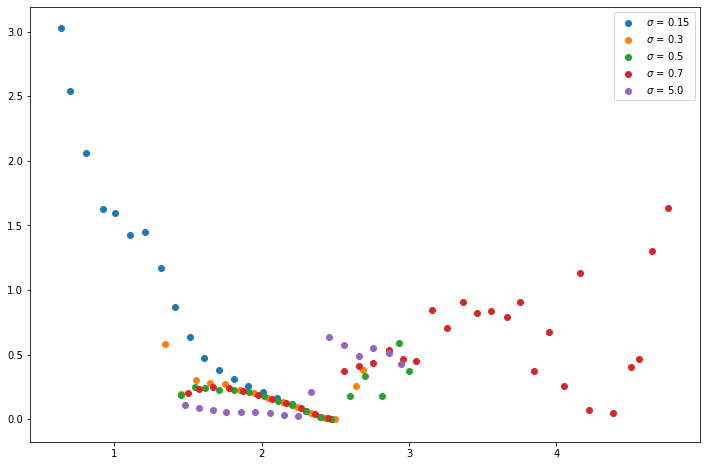

In [207]:
def plotter(df,esigmas,factor,xscale,binval,bins,inter):
    fig, ax = plt.subplots(figsize = (12, 8))
    for esigma in esigmas:
        df_sigma = df[df['esigma'] == esigma]
        df_sigma['Dn'] = 1/df_sigma['Dn'].values
        #df_sigma = df_sigma[df_sigma['r'] > 1]
        minval = df_sigma[binval].min()
        maxval = df_sigma[binval].max()
        
        df_sigma[bins] = pd.cut(x = df_sigma[binval], bins=np.arange(minval,maxval,inter), labels=[i for i in np.arange(minval,maxval - inter,inter)])
        #df_sigma = df_sigma[df_sigma['r'] < 5]
        plot = df_sigma.groupby([bins]).mean()
        #print(plot)
        if binval == xscale:
            xplot = plot[binval].index
        else:
            xplot = plot[binval]
        plt.scatter(xplot,plot[factor],label = "$\sigma$ = " + str(esigma))
    #plt.xticks(np.arange(0, 50, step=3))
    #plt.yscale("function")
    #plt.xscale("log")

    plt.legend()
    plt.savefig(path + "plots/structure/" + factor+xscale+bins + ".png")
    plt.show()
    
#plotter(df,esigmas,"Dm",'r','r_0',0,22,0.2)
#plotter(df,esigmas,"Bf",'r','r_0',0,22,0.3)
plotter(df,esigmas,"Dm",'r','Dn','r_0',0.1)
#plotter(df,[0.7],"Dm",'r','r_0',0,0.7,0.1)
#plotter(df,[0.7],"Dm",'Dn','Dn_0',0,0.7,0.1)



    

<<<<<<<<<<< esigma =  0.15 r =  0
(16,)
(20, 25)
(16,)


/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Calculating <rho(r)rho(x-r)>
******************************<POOLING DATA>******************************
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
rho_x_r_tensor.shape =  (16, 50, 200, 25, 25)
self_core_lsit =  (16, 50, 200, 25, 25)
******************************<\POOLING DATA>******************************
Calculation mean of g_r_phi
Calculation mean of self_core
Calc

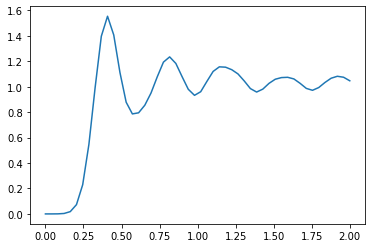

<<<<<<<<<<< esigma =  0.15 r =  1
(16,)
(20, 25)
(16,)


/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Calculating <rho(r)rho(x-r)>
******************************<POOLING DATA>******************************
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
rho_x_r_tensor.shape =  (16, 50, 200, 25, 25)
self_core_lsit =  (16, 50, 200, 25, 25)
******************************<\POOLING DATA>******************************
Calculation mean of g_r_phi
Calculation mean of self_core
Calc

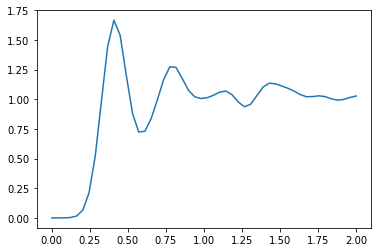

<<<<<<<<<<< esigma =  0.15 r =  3
(16,)
(20, 25)
(16,)


/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Calculating <rho(r)rho(x-r)>
******************************<POOLING DATA>******************************
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
rho_x_r_tensor.shape =  (16, 50, 200, 25, 25)
self_core_lsit =  (16, 50, 200, 25, 25)
******************************<\POOLING DATA>******************************
Calculation mean of g_r_phi
Calculation mean of self_core
Calc

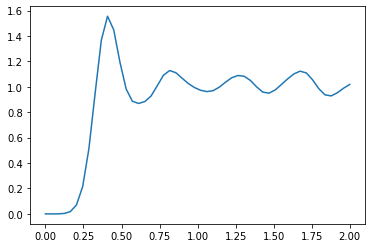

<<<<<<<<<<< esigma =  0.15 r =  15
(16,)
(20, 25)
(16,)


/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Calculating <rho(r)rho(x-r)>
******************************<POOLING DATA>******************************
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
rho_x_r_tensor.shape =  (16, 50, 200, 25, 25)
self_core_lsit =  (16, 50, 200, 25, 25)
******************************<\POOLING DATA>******************************
Calculation mean of g_r_phi
Calculation mean of self_core
Calc

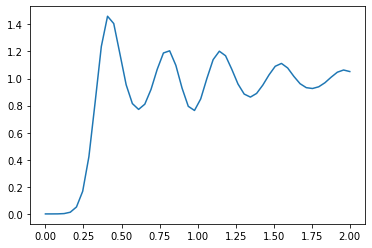

<<<<<<<<<<< esigma =  0.3 r =  0
(16,)
(20, 25)
(16,)


/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Calculating <rho(r)rho(x-r)>
******************************<POOLING DATA>******************************
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
rho_x_r_tensor.shape =  (16, 50, 200, 25, 25)
self_core_lsit =  (16, 50, 200, 25, 25)
******************************<\POOLING DATA>******************************
Calculation mean of g_r_phi
Calculation mean of self_core
Calc

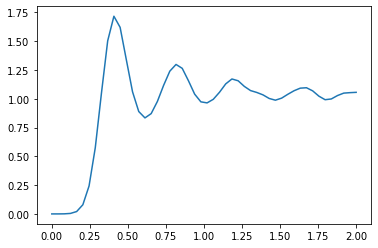

<<<<<<<<<<< esigma =  0.3 r =  1
(16,)
(20, 25)
(16,)


/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Calculating <rho(r)rho(x-r)>
******************************<POOLING DATA>******************************
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
rho_x_r_tensor.shape =  (16, 50, 200, 25, 25)
self_core_lsit =  (16, 50, 200, 25, 25)
******************************<\POOLING DATA>******************************
Calculation mean of g_r_phi
Calculation mean of self_core
Calc

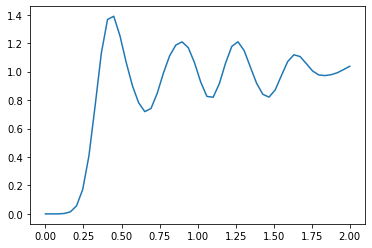

<<<<<<<<<<< esigma =  0.3 r =  3
(16,)
(20, 25)
(16,)


/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Calculating <rho(r)rho(x-r)>
******************************<POOLING DATA>******************************
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
rho_x_r_tensor.shape =  (16, 50, 200, 25, 25)
self_core_lsit =  (16, 50, 200, 25, 25)
******************************<\POOLING DATA>******************************
Calculation mean of g_r_phi
Calculation mean of self_core
Calc

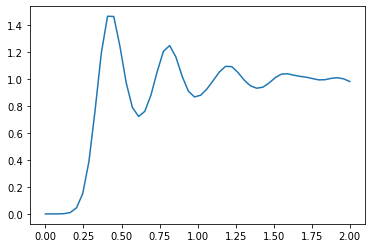

<<<<<<<<<<< esigma =  0.3 r =  15
(16,)
(20, 25)
(16,)


/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Calculating <rho(r)rho(x-r)>
******************************<POOLING DATA>******************************
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
rho_x_r_tensor.shape =  (16, 50, 200, 25, 25)
self_core_lsit =  (16, 50, 200, 25, 25)
******************************<\POOLING DATA>******************************
Calculation mean of g_r_phi
Calculation mean of self_core
Calc

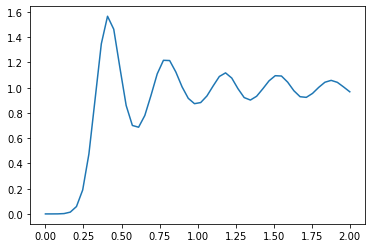

<<<<<<<<<<< esigma =  0.5 r =  0
(16,)
(20, 25)
(16,)


/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Calculating <rho(r)rho(x-r)>
******************************<POOLING DATA>******************************
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
rho_x_r_tensor.shape =  (16, 50, 200, 25, 25)
self_core_lsit =  (16, 50, 200, 25, 25)
******************************<\POOLING DATA>******************************
Calculation mean of g_r_phi
Calculation mean of self_core
Calc

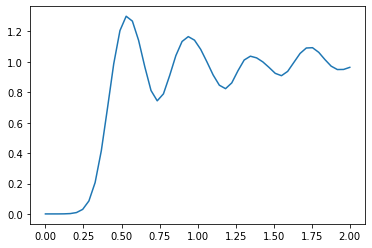

<<<<<<<<<<< esigma =  0.5 r =  1
(16,)
(20, 25)
(16,)


/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Calculating <rho(r)rho(x-r)>
******************************<POOLING DATA>******************************
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
rho_x_r_tensor.shape =  (16, 50, 200, 25, 25)
self_core_lsit =  (16, 50, 200, 25, 25)
******************************<\POOLING DATA>******************************
Calculation mean of g_r_phi
Calculation mean of self_core
Calc

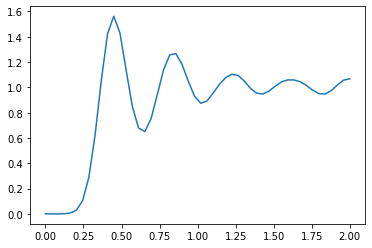

<<<<<<<<<<< esigma =  0.5 r =  3
(16,)
(20, 25)
(16,)


/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Calculating <rho(r)rho(x-r)>
******************************<POOLING DATA>******************************
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
rho_x_r_tensor.shape =  (16, 50, 200, 25, 25)
self_core_lsit =  (16, 50, 200, 25, 25)
******************************<\POOLING DATA>******************************
Calculation mean of g_r_phi
Calculation mean of self_core
Calc

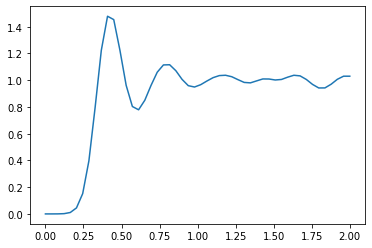

<<<<<<<<<<< esigma =  0.5 r =  15
(16,)
(20, 25)
(16,)


/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Calculating <rho(r)rho(x-r)>
******************************<POOLING DATA>******************************
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
rho_x_r_tensor.shape =  (16, 50, 200, 25, 25)
self_core_lsit =  (16, 50, 200, 25, 25)
******************************<\POOLING DATA>******************************
Calculation mean of g_r_phi
Calculation mean of self_core
Calc

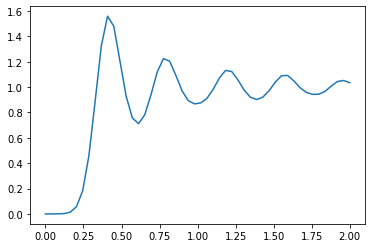

<<<<<<<<<<< esigma =  0.7 r =  0
(16,)
(20, 25)
(16,)


/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Calculating <rho(r)rho(x-r)>
******************************<POOLING DATA>******************************
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
rho_x_r_tensor.shape =  (16, 50, 200, 25, 25)
self_core_lsit =  (16, 50, 200, 25, 25)
******************************<\POOLING DATA>******************************
Calculation mean of g_r_phi
Calculation mean of self_core
Calc

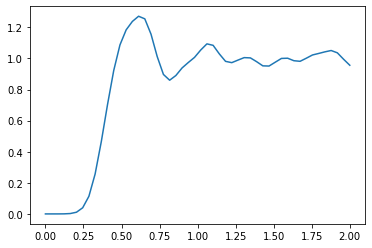

<<<<<<<<<<< esigma =  0.7 r =  1
(16,)
(20, 25)
(16,)


/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Calculating <rho(r)rho(x-r)>
******************************<POOLING DATA>******************************
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
rho_x_r_tensor.shape =  (16, 50, 200, 25, 25)
self_core_lsit =  (16, 50, 200, 25, 25)
******************************<\POOLING DATA>******************************
Calculation mean of g_r_phi
Calculation mean of self_core
Calc

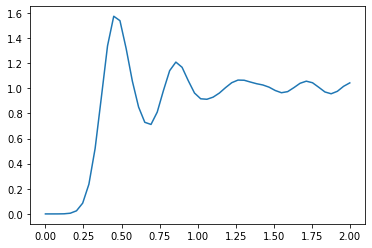

<<<<<<<<<<< esigma =  0.7 r =  3
(16,)
(20, 25)
(16,)


/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Calculating <rho(r)rho(x-r)>
******************************<POOLING DATA>******************************
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
rho_x_r_tensor.shape =  (16, 50, 200, 25, 25)
self_core_lsit =  (16, 50, 200, 25, 25)
******************************<\POOLING DATA>******************************
Calculation mean of g_r_phi
Calculation mean of self_core
Calc

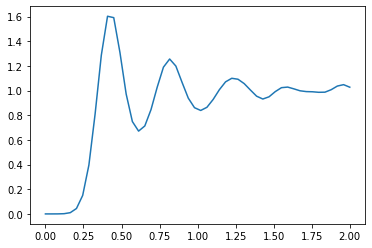

<<<<<<<<<<< esigma =  0.7 r =  15
(16,)
(20, 25)
(16,)


/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Calculating <rho(r)rho(x-r)>
******************************<POOLING DATA>******************************
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
rho_x_r_tensor.shape =  (16, 50, 200, 25, 25)
self_core_lsit =  (16, 50, 200, 25, 25)
******************************<\POOLING DATA>******************************
Calculation mean of g_r_phi
Calculation mean of self_core
Calc

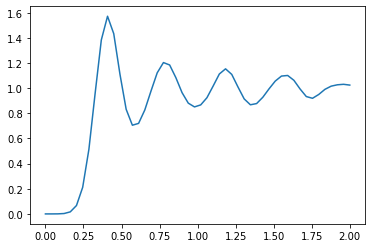

<<<<<<<<<<< esigma =  5.0 r =  0
(16,)
(20, 25)
(16,)


/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Calculating <rho(r)rho(x-r)>
******************************<POOLING DATA>******************************
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
rho_x_r_tensor.shape =  (16, 50, 200, 25, 25)
self_core_lsit =  (16, 50, 200, 25, 25)
******************************<\POOLING DATA>******************************
Calculation mean of g_r_phi
Calculation mean of self_core
Calc

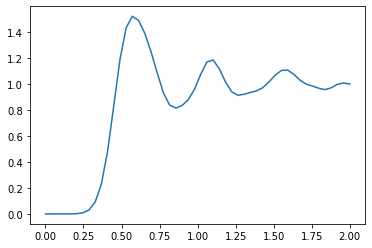

<<<<<<<<<<< esigma =  5.0 r =  1
(16,)
(20, 25)
(16,)


/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Calculating <rho(r)rho(x-r)>
******************************<POOLING DATA>******************************
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
rho_x_r_tensor.shape =  (16, 50, 200, 25, 25)
self_core_lsit =  (16, 50, 200, 25, 25)
******************************<\POOLING DATA>******************************
Calculation mean of g_r_phi
Calculation mean of self_core
Calc

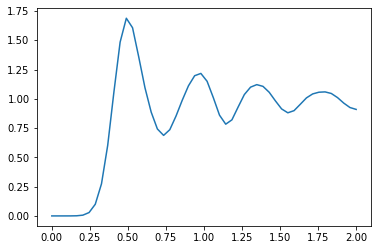

<<<<<<<<<<< esigma =  5.0 r =  3
(16,)
(20, 25)
(16,)


/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Calculating <rho(r)rho(x-r)>
******************************<POOLING DATA>******************************
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
rho_x_r_tensor.shape =  (16, 50, 200, 25, 25)
self_core_lsit =  (16, 50, 200, 25, 25)
******************************<\POOLING DATA>******************************
Calculation mean of g_r_phi
Calculation mean of self_core
Calc

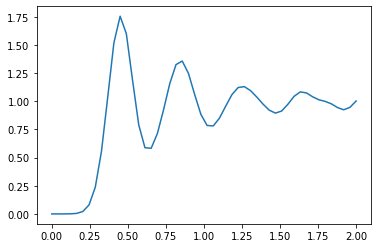

<<<<<<<<<<< esigma =  5.0 r =  15
(16,)
(20, 25)
(16,)


/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Calculating <rho(r)rho(x-r)>
******************************<POOLING DATA>******************************
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
Calculated two point correlation function
rho_x_r_tensor.shape =  (16, 50, 200, 25, 25)
self_core_lsit =  (16, 50, 200, 25, 25)
******************************<\POOLING DATA>******************************
Calculation mean of g_r_phi
Calculation mean of self_core
Calc

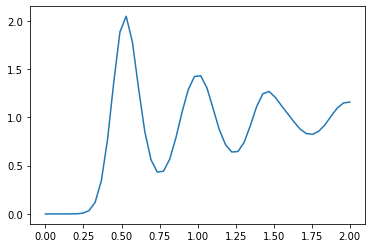

In [13]:
r = 0
r_list = [0,1,3,15]

dfcsv = pd.read_csv(path + "plots/structure/XYcsv/filelist.csv")
esigmas = [0.15,0.3,0.5,0.7,5.]

for esigma in esigmas:
    g_list = []
    x_l = []
    y_l = []
    data = dfcsv[dfcsv['testvar'] == esigma]["files"].values
    for pathname in data[0:16]:
            dfread = pd.read_csv(pathname)
            XY_red = pedReducer(dfread,-10,10,0,20,300)
            x_l.append(XY_red['x'].values)
            y_l.append(XY_red['y'].values)
    x_l = np.array(x_l)
    y_l = np.array(y_l)
    for r in r_list:
        print("<<<<<<<<<<< esigma = ", esigma, "r = ", r, ">>>>>>>>>>>>>")

        x_array = np.linspace(-0.2,0.2,25)
        y_array = np.linspace(r,r + 0.4,25)

        print(x_l.shape)
        #x_lnew = x_l
        #y_lnew = y_l
        x_lnew = []
        y_lnew = []

        for i in range(x_l.shape[0]):
            xy_l = pd.DataFrame({"x":x_l[i],"y":y_l[i]})
            xy_l_red = xy_l[abs(xy_l['x']) < 3]
            xy_l_red = xy_l_red[xy_l['y'] < r+5]
            xy_l_red = xy_l_red[xy_l['y'] > r]
            x_lnew.append(xy_l_red['x'].values)
            y_lnew.append(xy_l_red['y'].values)



        x_arr = np.array([x_array for i in range(20)])
        y_arr = np.array([y_array for i in range(20)])
        print(x_arr.shape)
        print(np.array(x_l).shape)
        r_array = np.linspace(0,2,50)
        phi_array = np.linspace(0,3.1415,200)
        g_r_phi, norm = cff.correlation_data(x_lnew,y_lnew,x_arr,y_arr,r_array,phi_array,0.13)
        para = ["10000","50","50","medium","-3","3",str(r),str(r+5)]
        g_list.append([g_r_phi,norm,para])

In [146]:
fig, ax = plt.subplots(figsize = (10, 8))
esigmas = [0.15,0.3,0.5,0.7,5.]
second = 300
for esigma in esigmas:
    esigmaname = "esigma" + af.b_data_name(esigma,3) +"/"
    print(esigmaname)
    dist = np.load(path + "plots/structure/distfield/" + esigmaname + "meandist300.npy")
    order = np.load(path + "plots/structure/distfield/" + esigmaname + "bondfactor300.npy")
    var = np.load(path + "plots/structure/distfield/" + esigmaname + "vardist300.npy")
    speed = np.load(path + "plots/structure/distfield/" + esigmaname + "speed300.npy")
    dens = np.load(path + "plots/structure/distfield/" + esigmaname + "density300.npy")
    #OrderFieldPlot([dens_matrix_2],x_array,y_array,XY_red,"distfield/" + test_str + af.b_data_name(esigma,3) + "/","speed" + str(second), "png",6,0,"plasma",False)
    #OrderFieldPlot([speed_matrix_2],x_array,y_array,XY_red,"distfield/" + test_str + af.b_data_name(esigma,3) + "/","density" + str(second), "png",1.34,0,"plasma",False)

    r_new, Rorder = MeanBondFacotrR(order,x_array,y_array,"Orderfield/rmean/" + test_str + af.b_data_name(esigma,3),"order_" + str(second),"png",[0,0.4])
    r_new, Rdist = MeanBondFacotrR(dist,x_array,y_array,"Orderfield/rmean/" + test_str + af.b_data_name(esigma,3),"meandist_" + str(second),"png",[0,0.6])
    r_new, Rvardist = MeanBondFacotrR(var,x_array,y_array,"Orderfield/rmean/" + test_str + af.b_data_name(esigma,3),"vardist_" + str(second),"png",[0,0.06])
    r_new, Rspeed = MeanBondFacotrR(speed,x_array,y_array,"Orderfield/rmean/" + test_str + af.b_data_name(esigma,3),"speed_" + str(second),"png",[0,0.3])
    r_new, Rdens = MeanBondFacotrR(dens,x_array,y_array,"Orderfield/rmean/" + test_str + af.b_data_name(esigma,3),"dens_" + str(second),"png",[0,8])
    plt.scatter(1/dist,var,label = "sigma = " + str(esigma))
plt.xlabel("<1/d> in 1/m")
plt.legend()
plt.ylabel("mean dist var")
#plt.savefig(path + "plots/structure/"+ "MaenDistvardist" + "." + "png")
plt.show()
"""plt.scatter(1/np.array(Rdist),Rorder)
plt.scatter(1/np.array(Rdist),Rvardist)
plt.show()
plt.scatter(Rspeed,Rorder)
plt.scatter(Rspeed,Rvardist)
plt.show()
plt.scatter(Rdens,Rorder)
plt.scatter(Rdens,Rvardist)
plt.show()"""
#plt.scatter(Rdens,1/np.array(Rdist))




esigma0_15/
Orderfield
rmean
Orderfield
rmean
Orderfield
rmean
Orderfield
rmean
Orderfield
rmean
esigma0_3/
Orderfield
rmean
Orderfield
rmean
Orderfield
rmean
Orderfield
rmean
Orderfield
rmean
esigma0_5/
Orderfield
rmean
Orderfield
rmean
Orderfield
rmean
Orderfield
rmean
Orderfield
rmean
esigma0_7/
Orderfield
rmean
Orderfield
rmean
Orderfield
rmean
Orderfield
rmean
Orderfield
rmean
esigma5_0/
Orderfield
rmean
Orderfield
rmean
Orderfield
rmean
Orderfield
rmean
Orderfield
rmean


KeyboardInterrupt: 

In [ ]:
measure = []
measure_bond = []
mulist = np.arange(0,5.0,0.2)
for mu in mulist:
    x,y = hexagonalLattice(100,1,mu,0,1,1)
    points = np.vstack((x[0],y[0])).T
    tri = Delaunay(points)
    box = [-10,10,20,40]
    N = tri.points.shape[0]
    local_bond_list = np.empty(N)
    neighbour_list, neigh_dist_list, local_bond_list,distmean = localOrientationMeasures(tri,N,filtered,box)
    print(neigh_dist_list/0.17)
    measure.append(neigh_dist_list.mean()/0.18)
    measure_bond.append(local_bond_list.mean())
plt.plot(mulist,measure)
plt.plot(mulist,measure_bond)
#plt.plot(measure,measure_bond)

In [ ]:
plt.scatter(mulist,measure)
plt.scatter(mulist,measure_bond)
from scipy.stats import gamma


In [ ]:
x = 30 * np.random.rand(100) - 15
y = 30 * np.random.rand(100) 
#x,y = hexagonalLattice(100,1,0,0,1,1)
#XY = pd.DataFrame({'x':x[0],'y':y[0]})
print("<Calculate Delaunay and local bond factor>")
points = np.vstack((x,y)).T
tri = Delaunay(points)
N = tri.points.shape[0]
local_bond_list = np.empty(N)
print("<calc local measure>")
neighbour_list, neigh_dist_list, local_bond_list, neighdist = localOrientationMeasures(tri,N,filtered,box)
print(neigh_dist_list.mean())

In [ ]:
r = 0
r_list = [0,1,3]
g_list = []

for r in r_list:
    x_array = np.linspace(-0.2,0.2,25)
    y_array = np.linspace(r,r + 0.4,25)

    print(x_l.shape)
    #x_lnew = x_l
    #y_lnew = y_l
    x_lnew = []
    y_lnew = []

    for i in range(x_l.shape[0]):
        xy_l = pd.DataFrame({"x":x_l[i],"y":y_l[i]})
        xy_l_red = xy_l[abs(xy_l['x']) < 3]
        xy_l_red = xy_l_red[xy_l['y'] < r+5]
        xy_l_red = xy_l_red[xy_l['y'] > r]
        x_lnew.append(xy_l_red['x'].values)
        y_lnew.append(xy_l_red['y'].values)



    x_arr = np.array([x_array for i in range(20)])
    y_arr = np.array([y_array for i in range(20)])
    print(x_arr.shape)
    print(np.array(x_l).shape)
    r_array = np.linspace(0,2,50)
    phi_array = np.linspace(0,3.1415,200)
    g_r_phi, norm = cff.correlation_data(x_lnew,y_lnew,x_arr,y_arr,r_array,phi_array,0.13)
    para = ["10000","50","50","medium","-3","3",str(r),str(r+5)]
    g_list.append([g_r_phi,norm,para])


In [ ]:
for g in g_list:
    plot_correlation(g[0]/g[1],str(r),path,".pdf", r_array, phi_array, g[2], True)

In [ ]:
diff/openvotes

In [ ]:
openvotes

In [ ]:
print(x)

In [ ]:
print(biden + x * openvotes)
print(trump + (1-x) * openvotes)

In [ ]:
trump = 3118163
biden = 2798232
percentCounted = 0.84
openvotes = round((trump + biden) / percentCounted) -trump - biden
print("open votes = ", openvotes)
if trump > biden:
    diff = trump - biden
else:
    diff = biden - trump
x = diff/(2*openvotes) + 0.5 
print("percentage to win = ", x)

In [ ]:
0.6620772865904749
0.6527021466076312
0.6478029555662663

In [ ]:
plt.scatter([81,82,83,84],[0.6620772865904749,0.6527021466076312,0.6478029555662663,0.6419477838946804])
plt.xlabel("percentage counted")
plt.ylabel("percentage needed of uncounted votes")